In [1]:
from recognition import *

import matplotlib.pyplot as plt

/mnt/c/Users/joaodavid/Desktop/practical/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


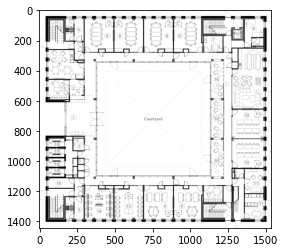

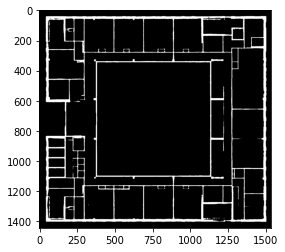

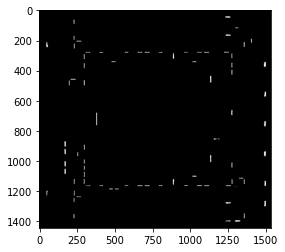

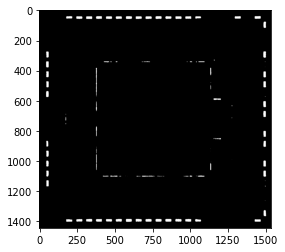

In [2]:
original = cv2.imread('./01_Ground_floor_plan.png')
rooms_pred, icons_pred = predict(original)
plt.imshow(original)
plt.show()

# Structural elements
walls_closed = as_image(rooms_pred == 2)
plt.imshow(walls_closed, cmap='gray')
plt.show()

doors_pixels = as_image(icons_pred ==  2)
plt.imshow(doors_pixels, cmap='gray')
plt.show()

windows_pixels = as_image(icons_pred ==  1)
plt.imshow(windows_pixels, cmap='gray')
plt.show()
# Decorative elements
closets_pixels = as_image(icons_pred == 3)
toilets_pixels = as_image(icons_pred == 5)
sinks_pixels = as_image(icons_pred == 6)
bathtubs_pixels = as_image(icons_pred == 9)
##

In [21]:
## Vectorization and adding semantics
room_cnts = get_room_contours_from_wall(walls_closed)
room_cnts = simplify_contours(room_cnts)

In [22]:
walls = contours_to_walls(room_cnts,)
walls = tuple({'points': w} for w in tqdm(walls))
# walls = tuple({'points': w, 'width': calculate_width(w, walls_closed)} for w in tqdm(walls, disable=not verbose))

100%|██████████| 41/41 [00:00<00:00, 514869.65it/s]


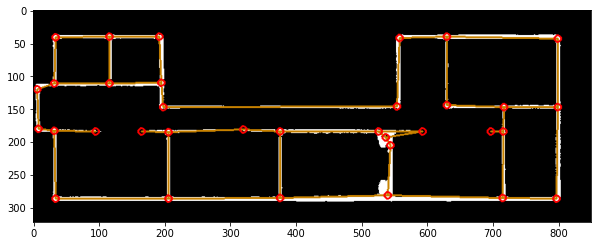

In [23]:
def show_img(im, walls=None, elements=None):
    im = np.expand_dims(im, axis=2).repeat(3, axis=2) 

    if walls:
        for w in walls:
            s, e = w['points'][0], w['points'][1]
            im = cv2.line(im, np.intp(s), np.intp(e), color=(200, 130, 0), thickness=2)
            im = cv2.circle(im, np.intp(s), color=(255, 0, 0), radius=5, thickness=2)
            im = cv2.circle(im, np.intp(e), color=(255, 0, 0), radius=5, thickness=2)

    if elements:
        for el in elements:
            s, e = el['points'][0], el['points'][1]
            ps, pe = el['perp'][0], el['perp'][1]

            color = (0, 255, 0) if el['type'] == 'window' else (0, 0, 255)
            pcolor = (50, 50, 210) if el['type'] == 'window' else (50, 210, 50) 
            im = cv2.line(im, np.intp(s), np.intp(e), color=color, thickness=2)
            im = cv2.line(im, np.intp(ps), np.intp(pe), color=pcolor, thickness=2)

    plt.figure(figsize=(10,10))
    plt.imshow(im)

show_img(walls_closed, walls)

In [24]:
doors = get_opening_lines(doors_pixels)
doors = tuple({'points': d, 'type': 'door'} for d in doors)
# FIXME: classify door as to be run after attaching to walls

windows = get_opening_lines(windows_pixels)
windows = tuple({'points': w, 'type': 'window'} for w in windows)


In [25]:
elements = tuple(el for el in doors + windows if np.linalg.norm(vector(el['points'])) > 10) 
print(len(elements))


12


{'points': array([[716.5, 168. ],
       [716.5, 155. ]], dtype=float32), 'type': 'door', 'perp': array([[711.5, 161.5],
       [721.5, 161.5]], dtype=float32)}


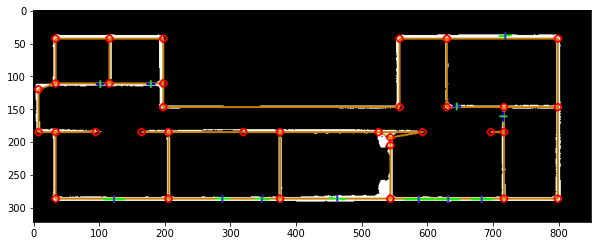

In [16]:
element_lines =  tuple({**e, 'perp': element_segment(e['points'])} for e in elements)
# element_lines =  tuple({**e, 'perp': e['points']} for e in doors + windows)
print(element_lines[0])
show_img(walls_closed, walls, element_lines)

In [26]:
walls = attach_openings(walls, elements, True)
walls

100%|██████████| 41/41 [00:00<00:00, 2255.80it/s]


({'points': array([[376., 184.],
         [526., 184.]], dtype=float32)},
 {'points': array([[376. , 184. ],
         [376.5, 285.5]], dtype=float32)},
 {'points': array([[376., 184.],
         [320., 181.]], dtype=float32)},
 {'points': array([[526., 184.],
         [537., 193.]], dtype=float32)},
 {'points': array([[526., 184.],
         [593., 184.]], dtype=float32)},
 {'points': array([[544. , 205. ],
         [540. , 281.5]], dtype=float32)},
 {'points': array([[544., 205.],
         [537., 193.]], dtype=float32)},
 {'points': array([[540. , 281.5],
         [376.5, 285.5]], dtype=float32),
  'elements': [{'points': array([[451.0045 , 285.93365],
           [475.96024, 287.59735]], dtype=float32),
    'type': 'window'}]},
 {'points': array([[540. , 281.5],
         [715.5, 285.5]], dtype=float32),
  'elements': [{'points': array([[667., 287.],
           [700., 287.]], dtype=float32),
    'type': 'window'},
   {'points': array([[614., 287.],
           [650., 287.]], dtype=float32

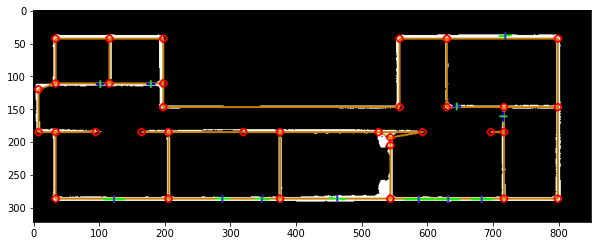

In [18]:
walls = normalize_wall_points(walls, 5)
show_img(walls_closed, walls, element_lines)

[{'points': array([[451.0045 , 285.93365],
       [475.96024, 287.59735]], dtype=float32), 'type': 'window'}]
[{'points': array([[667., 287.],
       [700., 287.]], dtype=float32), 'type': 'window'}, {'points': array([[614., 287.],
       [650., 287.]], dtype=float32), 'type': 'window'}, {'points': array([[565., 287.],
       [610., 287.]], dtype=float32), 'type': 'window'}]
[{'points': array([[338.06226, 286.00394],
       [359.97662, 287.37357]], dtype=float32), 'type': 'window'}, {'points': array([[278. , 286.5],
       [299. , 286.5]], dtype=float32), 'type': 'window'}]
[{'points': array([[107., 287.],
       [139., 287.]], dtype=float32), 'type': 'window'}]
[{'points': array([[716.5, 168. ],
       [716.5, 155. ]], dtype=float32), 'type': 'door'}]


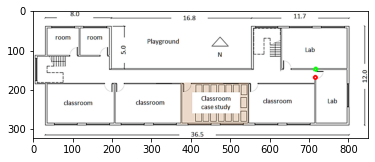

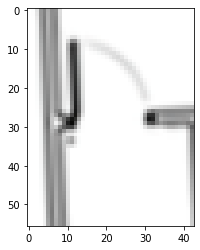

single_ul
[{'points': array([[639. , 146.5],
       [651. , 146.5]], dtype=float32), 'type': 'door'}]


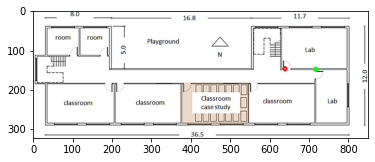

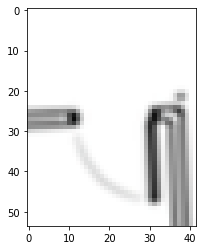

single_dr
[{'points': array([[ 96. , 112.5],
       [108. , 112.5]], dtype=float32), 'type': 'door'}]


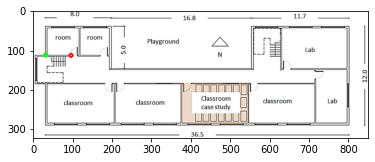

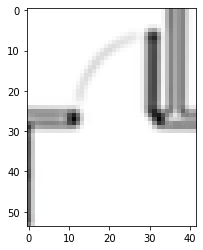

single_ur
[{'points': array([[173. , 112.5],
       [185. , 112.5]], dtype=float32), 'type': 'door'}]


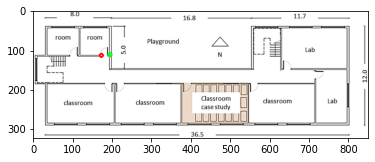

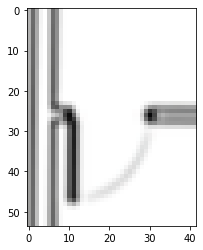

single_dl
[{'points': array([[710.05865,  39.99655],
       [728.9931 ,  38.88276]], dtype=float32), 'type': 'window'}]


In [27]:
from door_classification import crop_door

for wall in walls:
    if 'elements' in wall:
        print(wall['elements'])
        for element in wall['elements']:
            if element['type'] != 'window':
                print('='*50)

                orig_img = original.copy()
                orig_img = cv2.circle(orig_img, np.intp(element['points'][0]), 4, (255, 0, 0,), 4)
                orig_img = cv2.circle(orig_img, np.intp(wall['points'][0]), 4, (0, 255, 0,), 4)
                plt.imshow(orig_img)
                plt.show()

                cropped_door = crop_door(element, wall, original)
                plt.imshow(cropped_door)
                plt.show()

                element['type'] = classify_door(element, wall, original)
                print(element['type'])

# Just call main

In [1]:
from recognition import *
import matplotlib.pyplot as plt

/mnt/c/Users/joaodavid/Desktop/practical/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = main('01_Ground_floor_plan.png')
results

2022-05-04 15:41:31,286 INFO - Performing segmentation
2022-05-04 15:42:15,342 INFO - Simplifying contours
2022-05-04 15:42:16,344 INFO - Converting polygons to walls
2022-05-04 15:43:29,833 INFO - Calculating wall width
100%|██████████| 290/290 [00:00<00:00, 1715582.74it/s]
2022-05-04 15:43:29,852 INFO - Identifying wall openings and associating them with their respective walls
100%|██████████| 290/290 [00:01<00:00, 176.83it/s]
2022-05-04 15:43:31,657 INFO - Classifying doors individually
100%|██████████| 290/290 [00:04<00:00, 64.86it/s] 
2022-05-04 15:43:36,132 INFO - Retrieving icons
2022-05-04 15:43:36,139 INFO - Finished


{'walls': [{'points': array([[  68. , 1391.5],
          [ 168. , 1381.5]], dtype=float32)},
  {'points': array([[  68. , 1391.5],
          [ 168. , 1391.5]], dtype=float32)},
  {'points': array([[  55.75, 1391.5 ],
          [  68.  , 1391.5 ]], dtype=float32)},
  {'points': array([[ 168. , 1391.5],
          [ 168. , 1381.5]], dtype=float32)},
  {'points': array([[ 168. , 1381.5],
          [ 168. , 1310. ]], dtype=float32)},
  {'points': array([[ 168. , 1391.5],
          [ 234. , 1393. ]], dtype=float32),
   'elements': [{'points': array([[ 181. , 1392.5],
            [ 218. , 1392.5]], dtype=float32),
     'type': 'window'}]},
  {'points': array([[1278.5, 1393. ],
          [1279. , 1276.5]], dtype=float32)},
  {'points': array([[1278.5  , 1165.375],
          [1279.   , 1276.5  ]], dtype=float32)},
  {'points': array([[1217.5, 1276.5],
          [1279. , 1276.5]], dtype=float32),
   'elements': [{'points': array([[1237., 1276.],
            [1267., 1276.]], dtype=float32),
     

In [4]:
original = cv2.imread('01_Ground_floor_plan.png')
im = np.full(original.shape, 255).astype(np.uint8)

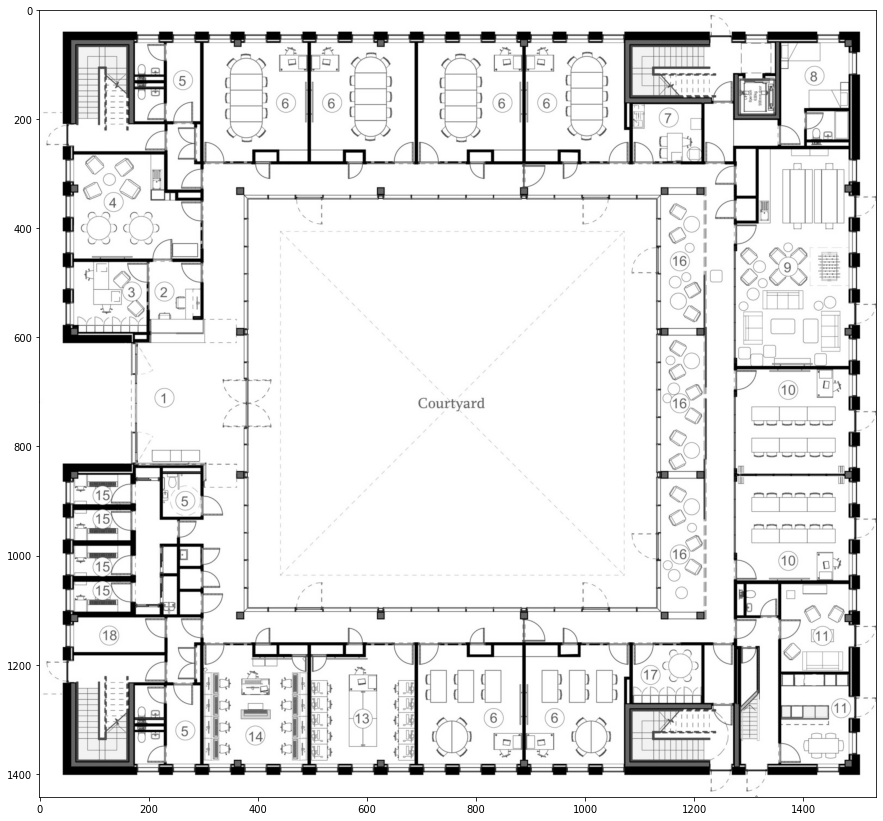

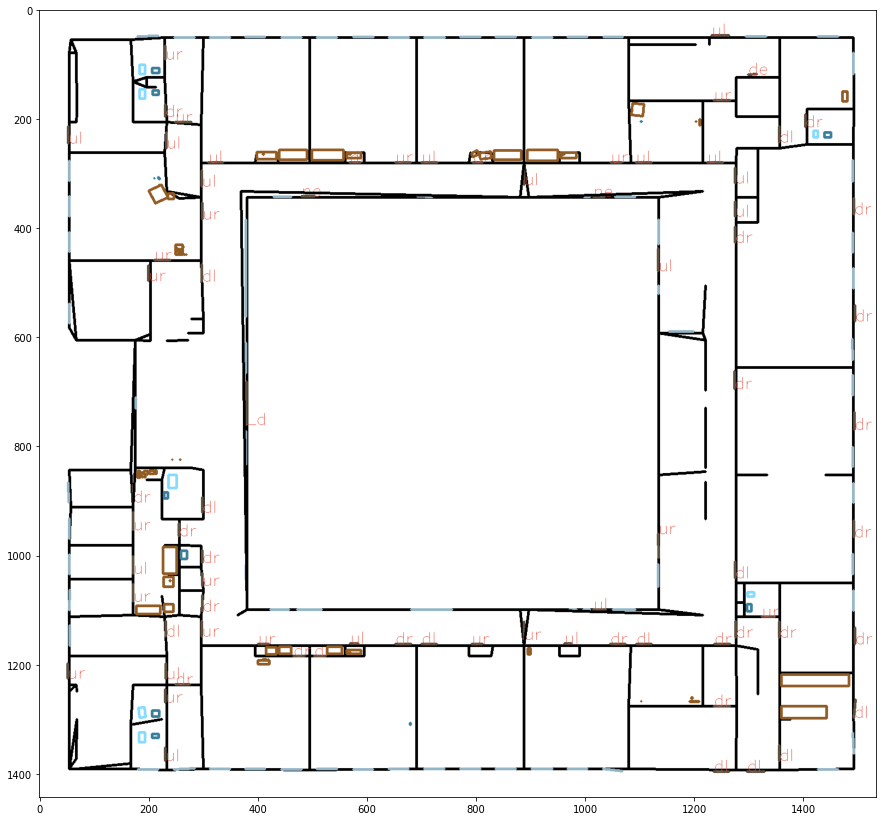

In [5]:
reconstr = im.copy()
for wall in results['walls']:
    s, e = wall['points']
    reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (0, 0, 0), 3)

    if 'elements'  in wall:
        for el in wall['elements']:
            s, e = el['points']
            if el['type'] == 'window':
                reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (147, 181, 198), 3)
            else:
                reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (94, 80, 63), 3)
                reconstr = cv2.putText(
                    reconstr, el['type'][-2:],
                    np.intp(s),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (230, 80, 63), 1, 2
                )

icons = ('closet', 'toilet', 'sink', 'bathtub')
colors = ((145, 91, 36), (133, 218, 255),  (58, 126, 156), (201, 30, 173))
for icon in results['icons']:
    # pts = np.intp(icon['points'])
    # print(pts, pts.shape, pts.reshape((-1, 1, 2)))
    reconstr = cv2.drawContours(reconstr, [np.intp(icon['points'])], 0, colors[icons.index(icon['type'])], 3)

plt.figure(figsize=(15, 15))
plt.imshow(original)

plt.figure(figsize=(15, 15))
plt.imshow(reconstr)
plt.show()